# 도로교통공단_사망 교통사고 데이터분석 
## 2조 : 김진서, 박금령, 최민성

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
from PIL import Image

import warnings
warnings.filterwarnings(action='ignore') # 오류무시

plt.rc('font', family='Malgun Gothic') # 한글폰트 사용

In [2]:
data = pd.read_csv("C:/Users/user/복습스터디ipynb/도로교통공단_사망_교통사고_정보.csv")

data.tail(5)

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
2653,2022,2022-12-30 6:00,주,금,1,0,0,0,0,경기,...,측면충돌,안전운전 의무 불이행,단일로,기타단일로,자전거,화물차,961179,1968034,127.059557,37.711064
2654,2022,2022-12-30 16:00,주,금,1,0,0,0,0,경기,...,길가장자리구역통행중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,948521,2003558,126.913420,38.030605
2655,2022,2022-12-30 23:00,야,금,1,1,0,1,0,서울,...,측면충돌,신호위반,교차로,교차로내,승용차,승합차,953659,1945091,126.975696,37.503926
2656,2022,2022-12-31 5:00,야,토,1,0,0,0,0,전북,...,측면충돌,신호위반,교차로,교차로횡단보도내,승용차,자전거,967119,1759855,127.135932,35.834649
2657,2022,2022-12-31 20:00,야,토,1,1,0,0,1,경기,...,횡단중,기타,단일로,기타단일로,이륜차,보행자,936235,1973854,126.776062,37.762120


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         2658 non-null   int64  
 1   발생년월일시      2658 non-null   object 
 2   주야          2658 non-null   object 
 3   요일          2658 non-null   object 
 4   사망자수        2658 non-null   int64  
 5   부상자수        2658 non-null   int64  
 6   중상자수        2658 non-null   int64  
 7   경상자수        2658 non-null   int64  
 8   부상신고자수      2658 non-null   int64  
 9   발생지시도       2658 non-null   object 
 10  발생지시군구      2658 non-null   object 
 11  사고유형_대분류    2658 non-null   object 
 12  사고유형_중분류    2658 non-null   object 
 13  사고유형        2658 non-null   object 
 14  가해자법규위반     2658 non-null   object 
 15  도로형태_대분류    2658 non-null   object 
 16  도로형태        2658 non-null   object 
 17  가해자_당사자종별   2658 non-null   object 
 18  피해자_당사자종별   2658 non-null   object 
 19  발생위치X_UTMK  2658 non-null  

## 데이터 전처리

In [4]:
# drop 할 컬럼 : 발생년, 발생위치X_UTMK, 발생위치Y_UTMK, 경도, 위도
data = data.drop(['발생년', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'], axis = 1)

data.tail(3)

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별
2655,2022-12-30 23:00,야,금,1,1,0,1,0,서울,동작구,차대차,측면충돌,측면충돌,신호위반,교차로,교차로내,승용차,승합차
2656,2022-12-31 5:00,야,토,1,0,0,0,0,전북,전주시,차대차,측면충돌,측면충돌,신호위반,교차로,교차로횡단보도내,승용차,자전거
2657,2022-12-31 20:00,야,토,1,1,0,0,1,경기,파주시,차대사람,횡단중,횡단중,기타,단일로,기타단일로,이륜차,보행자


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   발생년월일시     2658 non-null   object
 1   주야         2658 non-null   object
 2   요일         2658 non-null   object
 3   사망자수       2658 non-null   int64 
 4   부상자수       2658 non-null   int64 
 5   중상자수       2658 non-null   int64 
 6   경상자수       2658 non-null   int64 
 7   부상신고자수     2658 non-null   int64 
 8   발생지시도      2658 non-null   object
 9   발생지시군구     2658 non-null   object
 10  사고유형_대분류   2658 non-null   object
 11  사고유형_중분류   2658 non-null   object
 12  사고유형       2658 non-null   object
 13  가해자법규위반    2658 non-null   object
 14  도로형태_대분류   2658 non-null   object
 15  도로형태       2658 non-null   object
 16  가해자_당사자종별  2658 non-null   object
 17  피해자_당사자종별  2658 non-null   object
dtypes: int64(5), object(13)
memory usage: 373.9+ KB


In [6]:
data['발생년월일시'].head(2)

0    2022-01-01 10:00
1    2022-01-01 14:00
Name: 발생년월일시, dtype: object

In [7]:
# 발생월만 추출

import datetime as dt

data['발생년월일시'] = pd.to_datetime(data['발생년월일시'])

data = data.rename(columns={'발생년월일시':'월'})

data['월'] = data['월'].dt.month

data.head(2)

,월,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별
0,1,주,토,1,0,0,0,0,전남,순천시,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,교량위,승용차,없음
1,1,주,토,1,0,0,0,0,전북,전주시,차대차,추돌,추돌,안전운전 의무 불이행,단일로,기타단일로,원동기장치자전거,승용차


In [8]:
# 결측치 확인
data.isna().sum()

월            0
주야           0
요일           0
사망자수         0
부상자수         0
중상자수         0
경상자수         0
부상신고자수       0
발생지시도        0
발생지시군구       0
사고유형_대분류     0
사고유형_중분류     0
사고유형         0
가해자법규위반      0
도로형태_대분류     0
도로형태         0
가해자_당사자종별    0
피해자_당사자종별    0
dtype: int64

## 데이터 분석

### 1. 단변량분석

|	변수명	|	설명	|	구분	|
|----|----|----|
|	월 	|	 사고발생 월	|	feature	|
|	주야 	|	 사고발생 주/야 구분	|	feature	|
|	요일 	|	 사고발생 요일	|	feature	|
|	사망자수 	|	 사망자수	|	feature	|
|	부상자수 	|	 부상자수(중상+경상)	|	Target	 |
|	중상자수, 경상자수 	|	 중상자수, 경상자수	|	feature	|
|	부상신고자수 	|	 부상신고자수	|	feature	|
|	발생지시도, 발생지시군구 	|	 사고발생지 시/도, 시/군/구	|	feature	|



In [9]:
# 범주형데이터 분석함수 정의

def single(col):
    cnt = data[col].value_counts() # 도수
    ratio = data[col].value_counts()/data.shape[0] # 비율
    temp = pd.DataFrame({'범주':cnt.index, '도수':cnt.values, '비율':ratio.values})
    display(temp)
    
    sns.countplot(x = data[col])
    plt.grid()
    plt.show()
    
    
# 범주형데이터 분석함수2 정의

def single_rotated(col):
    cnt = data[col].value_counts() # 도수
    ratio = data[col].value_counts()/data.shape[0] # 비율
    temp = pd.DataFrame({'범주':cnt.index, '도수':cnt.values, '비율':ratio.values})
    display(temp)
    
    sns.countplot(x = data[col])
    plt.xticks(rotation = 90)
    plt.grid()
    plt.show()

,범주,도수,비율
0,10,280,0.105342
1,9,252,0.094808
2,11,250,0.094056
3,8,238,0.089541
4,7,234,0.088036
5,5,229,0.086155
6,12,226,0.085026
7,6,222,0.083521
8,4,209,0.078631
9,1,183,0.068849


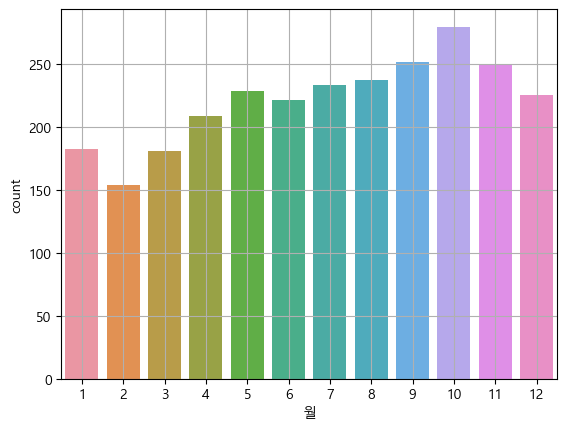

In [10]:
single('월')

,범주,도수,비율
0,금,412,0.155004
1,화,411,0.154628
2,목,391,0.147103
3,토,382,0.143717
4,수,380,0.142965
5,월,373,0.140331
6,일,309,0.116253


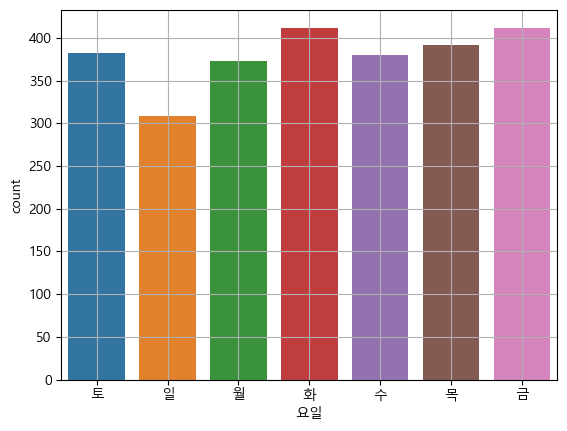

In [11]:
single('요일')

,범주,도수,비율
0,1,2586,0.972912
1,2,67,0.025207
2,3,5,0.001881


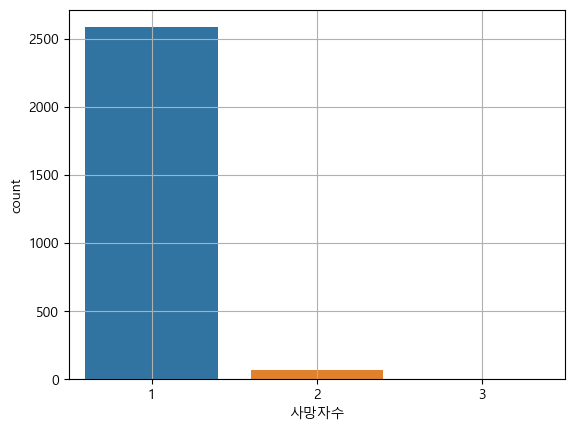

In [12]:
single('사망자수')

,범주,도수,비율
0,0,2075,0.780662
1,1,338,0.127163
2,2,133,0.050038
3,3,40,0.015049
4,4,34,0.012792
5,5,9,0.003386
6,6,9,0.003386
7,7,7,0.002634
8,8,4,0.001505
9,10,2,0.000752


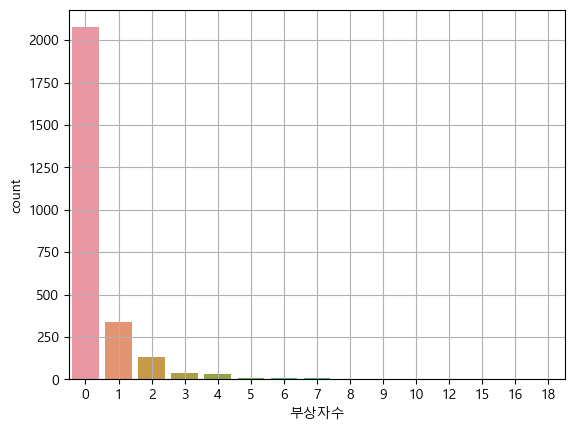

In [13]:
single('부상자수')

,범주,도수,비율
0,주,1469,0.552671
1,야,1189,0.447329


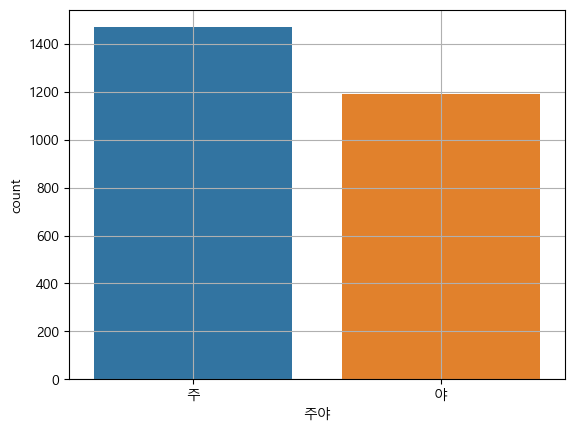

In [14]:
single('주야')

- 주간 야간 사망자수의 관계를 보았으나 이동량이 많은 주간에 많은것은 당연시 됨

,범주,도수,비율
0,차대차,1121,0.421746
1,차대사람,900,0.338600
2,차량단독,635,0.238901
3,철길건널목,2,0.000752


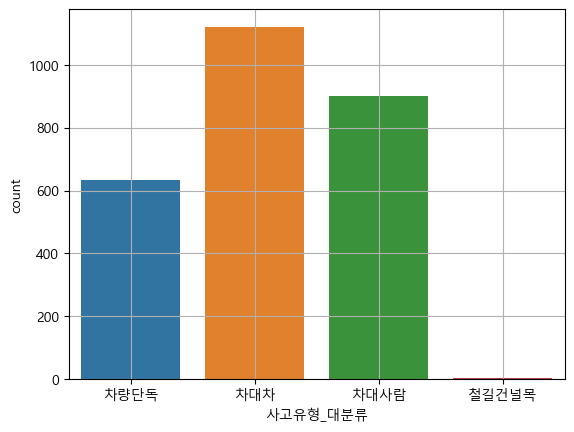

In [15]:
single('사고유형_대분류')

,범주,도수,비율
0,기타,631,0.237397
1,횡단중,431,0.162152
2,측면충돌,382,0.143717
3,추돌,316,0.118886
4,공작물충돌,304,0.114372
5,정면충돌,175,0.065839
6,차도통행중,148,0.055681
7,도로이탈,96,0.036117
8,전도,82,0.030850
9,길가장자리구역통행중,41,0.015425


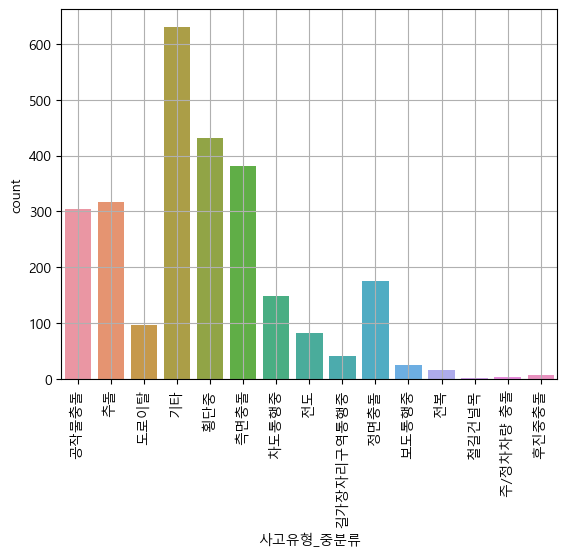

In [16]:
single_rotated('사고유형_중분류')

,범주,도수,비율
0,안전운전 의무 불이행,1753,0.659518
1,기타,314,0.118134
2,신호위반,223,0.083898
3,중앙선 침범,165,0.062077
4,보행자 보호의무 위반,102,0.038375
5,안전거리 미확보,57,0.021445
6,교차로 통행방법 위반,44,0.016554


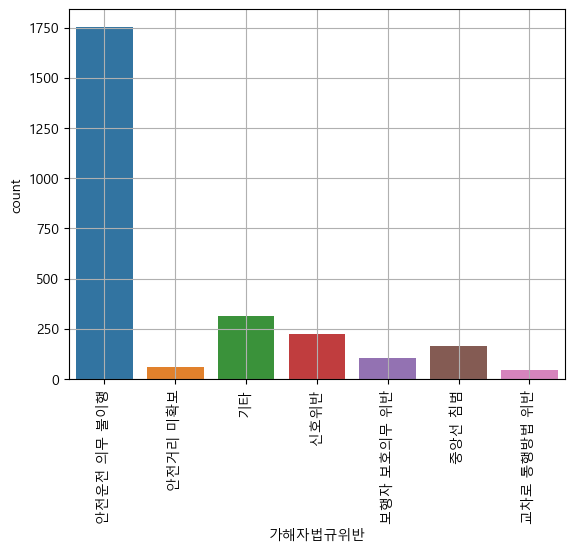

In [17]:
single_rotated('가해자법규위반')

- 안전운전 의무 불이행이 압도적으로 많은것으로 보아 아래의 신호위반, 중침, 보행자 보호의무 위반 등을 제외한 나머지 모든것을 하나로 묶은 것이라 생각됨
- 추가로 안전운전 의무 불이행과 기타를 제외한 나머지에서 신호 위반이 제일 높은 사망자수를 기록하였는데,
- 주간 혹은 야간, 월별로 어떤 상황에 신호위반을 하여 사망자가 기록되었는지 한번 확인해보고 싶다.

,범주,도수,비율
0,기타단일로,1448,0.544771
1,교차로내,523,0.196764
2,교차로부근,249,0.093679
3,교차로횡단보도내,141,0.053047
4,기타,133,0.050038
5,지하차도(도로)내,80,0.030098
6,교량위,42,0.015801
7,터널안,21,0.007901
8,고가도로위,18,0.006772
9,철길건널목,2,0.000752


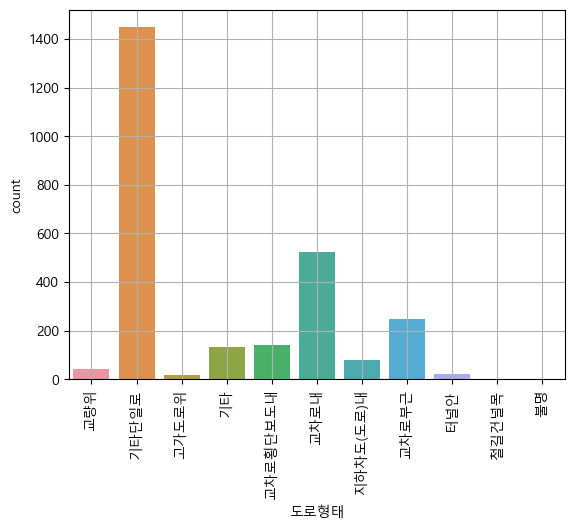

In [18]:
single_rotated('도로형태')

- 기타 단일로가 많은것을 보아 여러 단일로를 하나로 묶은것으로 보임
- 이를 제외한 나머지것을 비교하면 교차로내, 교차로 부근, 교차로 횡당보도 내 순으로 사망자가 많았고,
- 그래프를 통해 교차로에서 사망자수가 제일 많은것을 알 수 있고 위의 그래프를 통해
- 교차로에서 신호위반을 했을 때 사망자수가 많은 것이라 예측해볼 수 있다.

,범주,도수,비율
0,승용차,1151,0.433032
1,화물차,614,0.231001
2,이륜차,397,0.149360
3,승합차,141,0.053047
4,자전거,91,0.034236
5,건설기계,62,0.023326
6,농기계,58,0.021821
7,원동기장치자전거,53,0.019940
8,특수차,37,0.013920
9,사륜오토바이(ATV),27,0.010158


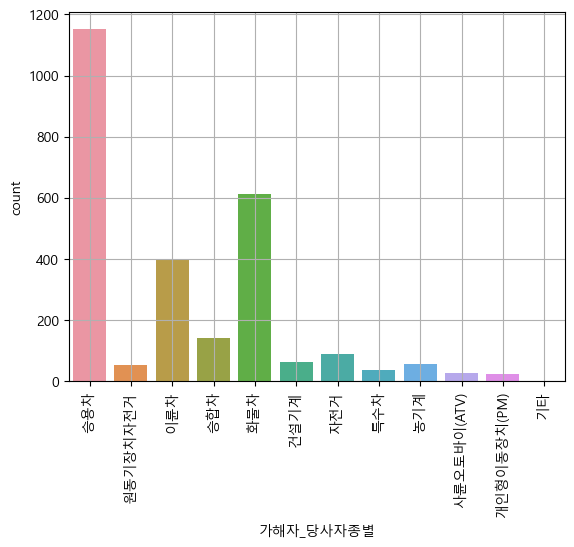

In [19]:
single_rotated('가해자_당사자종별')

,범주,도수,비율
0,보행자,900,0.338600
1,없음,630,0.237020
2,승용차,369,0.138826
3,화물차,243,0.091422
4,이륜차,196,0.073740
5,자전거,105,0.039503
6,승합차,70,0.026336
7,건설기계,37,0.013920
8,농기계,30,0.011287
9,원동기장치자전거,24,0.009029


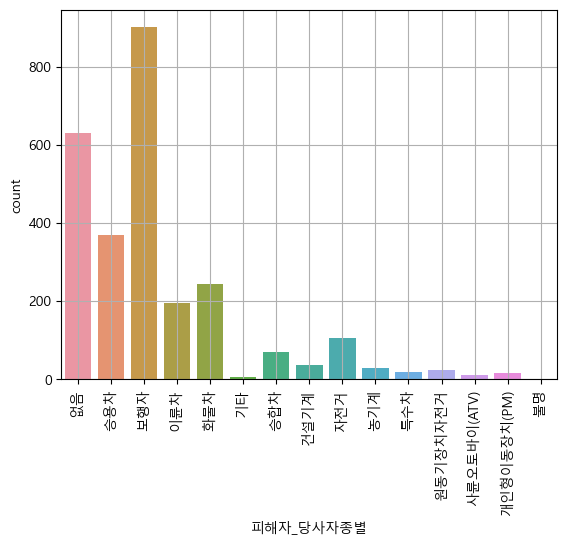

In [20]:
single_rotated('피해자_당사자종별')

- 보행자의 사망자수가 제일 많았고 다음으로는 없음인데 이는 어떤 것을 뜻하는지 알아볼 필요가 있음
- 아마 차량 단독사고이지 않을까 싶음
- 이외에는 차량의 비율별로 집계가 된듯하여 특이사항 없음

### 단독사고 분석
- 피해자가 '없음'인 data 분석

In [21]:
nothing = data[data['피해자_당사자종별'] == '없음']

nothing.tail(2)

,월,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별
2648,12,주,목,1,0,0,0,0,경기,평택시,차량단독,기타,기타,안전운전 의무 불이행,단일로,기타단일로,이륜차,없음
2649,12,주,목,2,3,3,0,0,서울,영등포구,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음


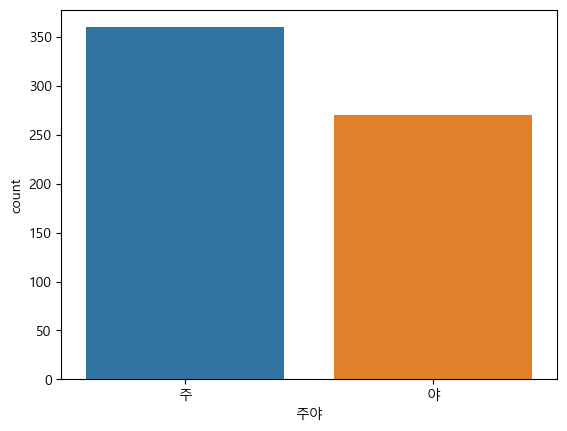

In [22]:
sns.countplot(x='주야', data=nothing)
plt.show()

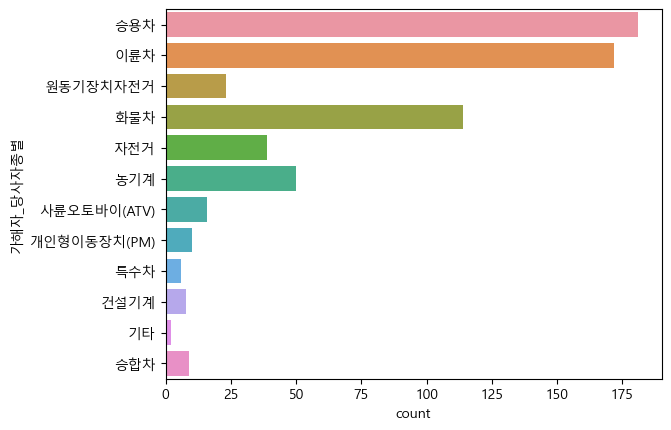

In [23]:
sns.countplot(y='가해자_당사자종별', data=nothing)
plt.show()

- 어쩔 수 없이 승용차의 비율이 많기 때문에 승용차가 많아보이긴 하지만
- 이륜차의 비율이 승용차에 비해 적지만 사망자 수가 비슷한것을 보아 사고시 사망률이 높은것으로 보인다.

#### 단독사고 중 이륜차 사고 분석

In [24]:
bike = nothing[nothing['가해자_당사자종별']=='이륜차']

bike.tail(2)

,월,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별
2646,12,주,목,1,0,0,0,0,경기,화성시,차량단독,기타,기타,안전운전 의무 불이행,기타,기타,이륜차,없음
2648,12,주,목,1,0,0,0,0,경기,평택시,차량단독,기타,기타,안전운전 의무 불이행,단일로,기타단일로,이륜차,없음


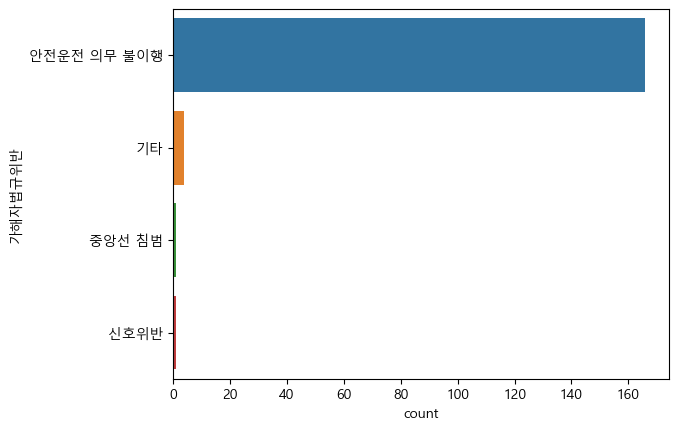

In [25]:
sns.countplot(y='가해자법규위반',data=bike)

plt.show()

**안전의무 불이행**이 주요 원인이되는 이륜차 사고 분석

이륜차 사고의 가장 일반적인 10가지 원인  
- 좌회전
- 부주의한 운전
- 교통 위협
- 통제할 수 없는 요인
- 도로 상태 
- 차선 분할
- 알코올 및 약물 사용
- 과속
- 경험 부족
- 기계적 문제

이중 좌회전, 부주의한 운전, 교통 위협, 알코올 및 약물사용, 과속 등이 안전의무 불이행에 해당하는 듯 싶다.

**단변량 분석 요약 해석**
- 행사나 명절 등의 이유로 연말에 사고건수가 많아지는 추세.
- 출 퇴근 등의 이유로 차량이동이 많은 주중, 주간에 사고건수 많은 편.
- 사망자, 부상자는 대부분 0~1명.
- 사고유형들 중, 차 : 횡단중인 사람, 차 : 차의 측면충돌, 추돌 등이 많음.
- 가해자가 위반한 법규의 대부분은 안전운전 의무 불이행임.
- 사고발생 도로형태는 대부분 단일로이고, 교차로에서 발생한 사고들도 많음.
- 사망사고 data이므로 차:사람 경우이거나 피해자가 보행자인 경우가 다반사.

### 2. 다변량분석

In [26]:
data.head(2)

,월,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별
0,1,주,토,1,0,0,0,0,전남,순천시,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,교량위,승용차,없음
1,1,주,토,1,0,0,0,0,전북,전주시,차대차,추돌,추돌,안전운전 의무 불이행,단일로,기타단일로,원동기장치자전거,승용차


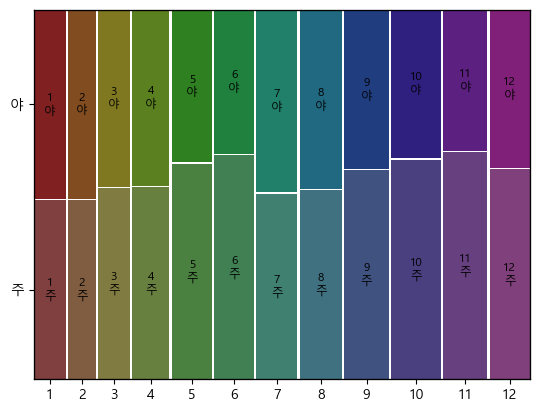

In [27]:
# 월 별 주야 빈도

mosaic(data, ['월', '주야'])
plt.show()

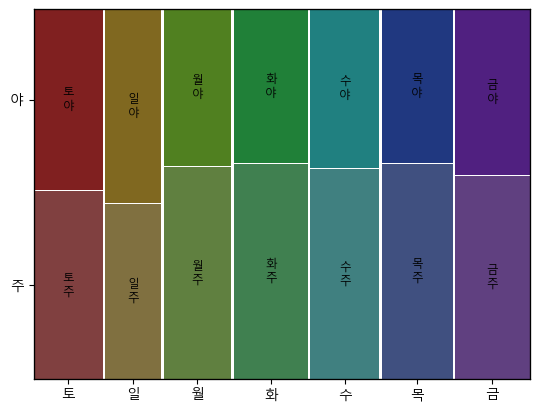

In [28]:
# 요일 별 주야 빈도

mosaic(data, ['요일', '주야'])
plt.show()

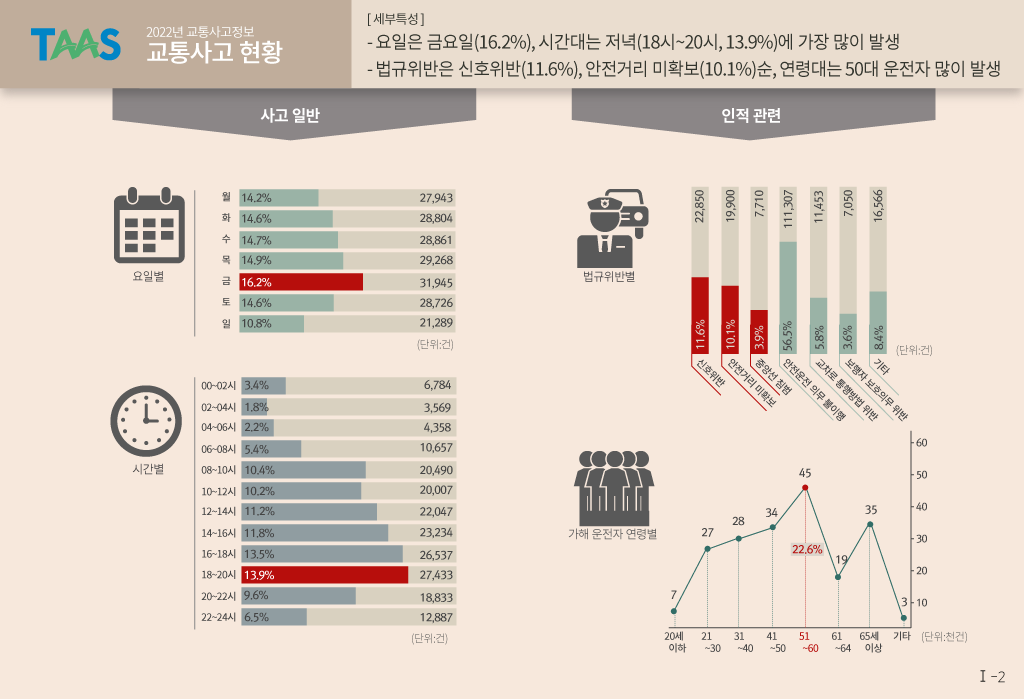

In [29]:
img = Image.open('data/stat02.png')

img

- 사고발생 빈도수는 **금,목,수,토요일** 순으로 비중을 차지했고 시간대는 **18~20시**(퇴근시간)이 가장 많았다.

### target case 분리(사망자수가 최소한 1인 데이터이기 때문에)
#### case1) target : 사망자 수, case2) target : 부상자 수

### case1) target : 사망자수

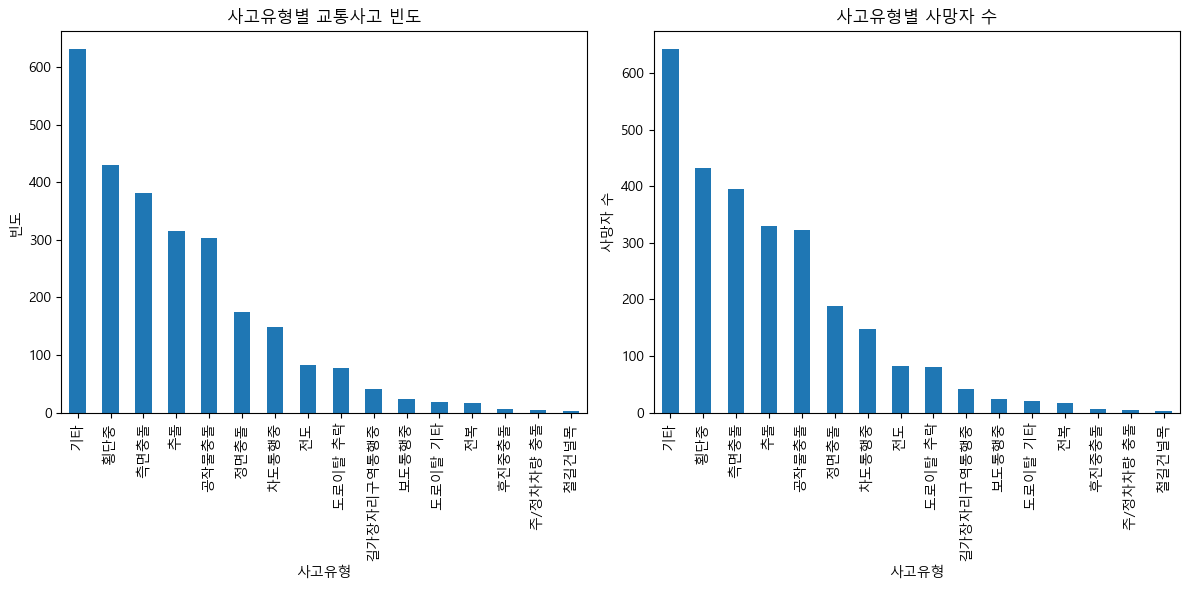

In [30]:
# 사고유형 별 사망자 수 분석

accident_types = data ['사고유형'].value_counts()
death = data.groupby('사고유형')['사망자수'].sum().sort_values(ascending=False)
# 그래프 그리기
plt.figure(figsize=(12, 6))

# 사고유형별 빈도
plt.subplot(121)
accident_types.plot(kind='bar')
plt.title('사고유형별 교통사고 빈도')
plt.xlabel('사고유형')
plt.ylabel('빈도')

# 사고유형별 사망자 수
plt.subplot(122)
death.plot(kind='bar')
plt.title('사고유형별 사망자 수')
plt.xlabel('사고유형')
plt.ylabel('사망자 수')

plt.tight_layout()
plt.show()

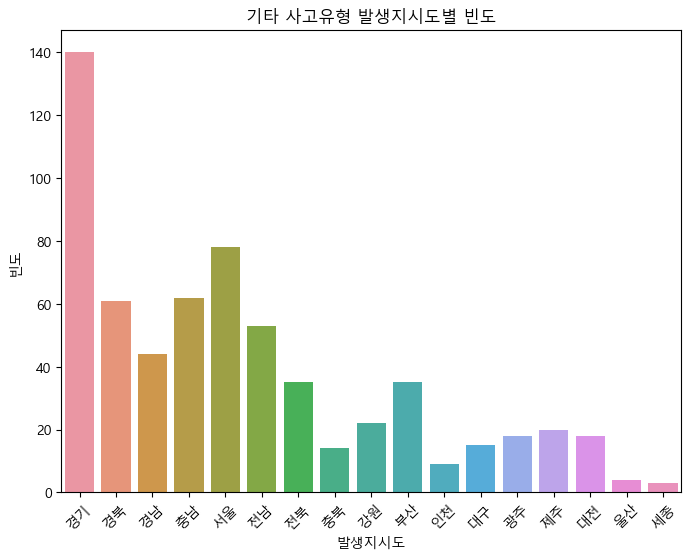

In [31]:
other_accident_counts = data[data['사고유형'] == '기타']['사고유형'].count()

# 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data=data[data['사고유형'] == '기타'], x='발생지시도', order=data['발생지시도'].value_counts().index)
plt.title('기타 사고유형 발생지시도별 빈도')
plt.xticks(rotation=45)
plt.xlabel('발생지시도')
plt.ylabel('빈도')
plt.show()

#### 경기도 빈도분포가 높아 경기도지역 분석 focusing

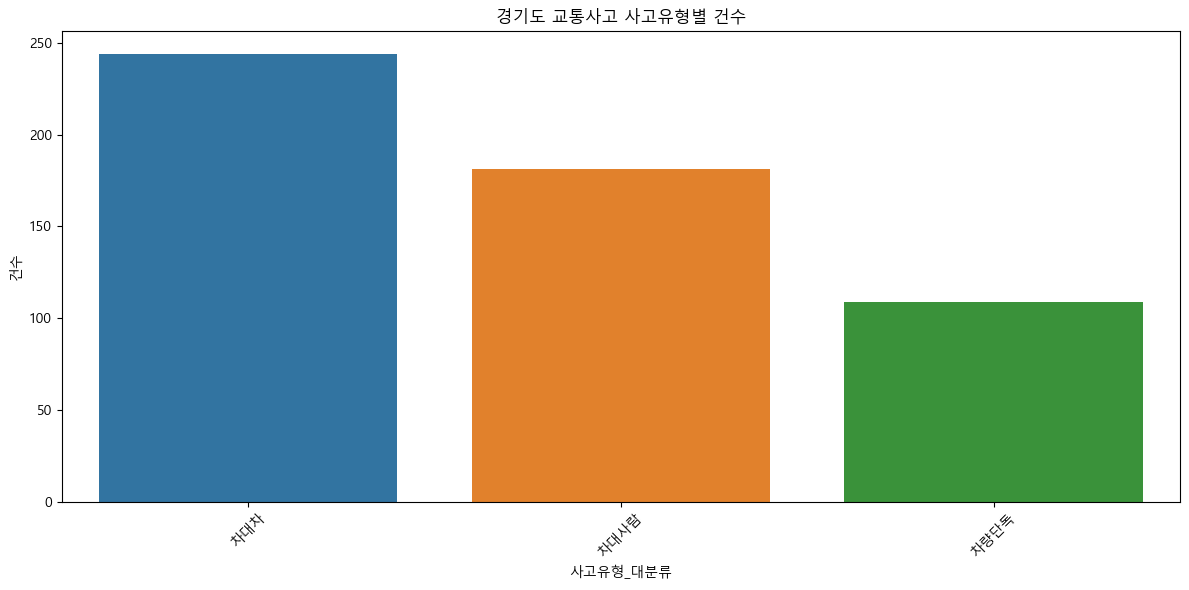

In [32]:
gyeonggi_data = data[data['발생지시도'] == '경기']

# 경기도에서 발생한 교통사고의 사고유형 시각화
plt.figure(figsize=(12, 6))
sns.countplot(data=gyeonggi_data, x='사고유형_대분류', order=gyeonggi_data['사고유형_대분류'].value_counts().index)
plt.title('경기도 교통사고 사고유형별 건수')
plt.xlabel('사고유형_대분류')
plt.ylabel('건수')
plt.xticks(rotation=45)  # x 축 레이블 회전
plt.tight_layout()
plt.show()

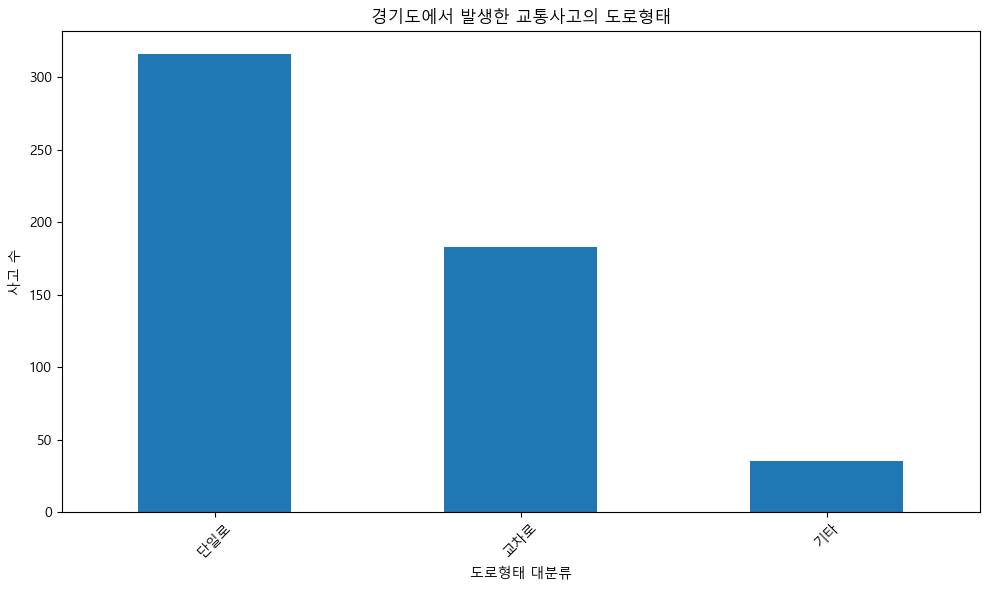

In [33]:
gyeonggi_accidents = data[data['발생지시도'] == '경기']

# 경기도에서 발생한 사고의 도로형태 카운트
road_type_counts = gyeonggi_accidents['도로형태_대분류'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
road_type_counts.plot(kind='bar', rot=45)
plt.title('경기도에서 발생한 교통사고의 도로형태')
plt.xlabel('도로형태 대분류')
plt.ylabel('사고 수')
plt.tight_layout()
plt.show()

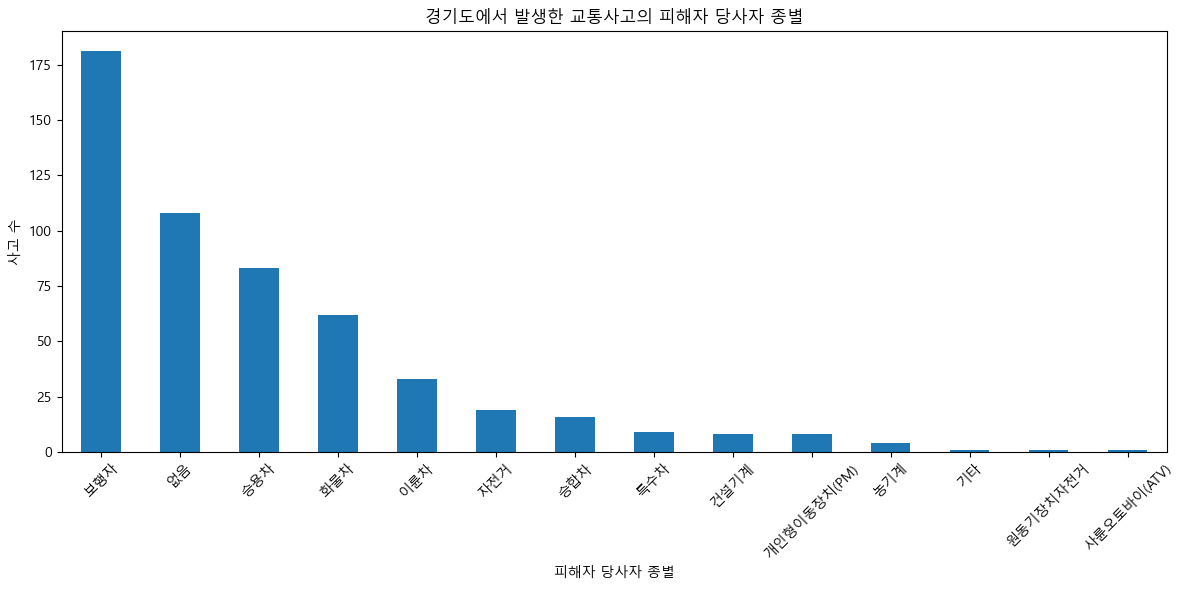

In [34]:
gyeonggi_accidents = data[data['발생지시도'] == '경기']

# 경기도에서 발생한 사고의 피해자 당사자 종별 카운트
victim_vehicle_counts = gyeonggi_accidents['피해자_당사자종별'].value_counts()

# 시각화
plt.figure(figsize=(12, 6))
victim_vehicle_counts.plot(kind='bar', rot=45)
plt.title('경기도에서 발생한 교통사고의 피해자 당사자 종별')
plt.xlabel('피해자 당사자 종별')
plt.ylabel('사고 수')
plt.tight_layout()
plt.show()

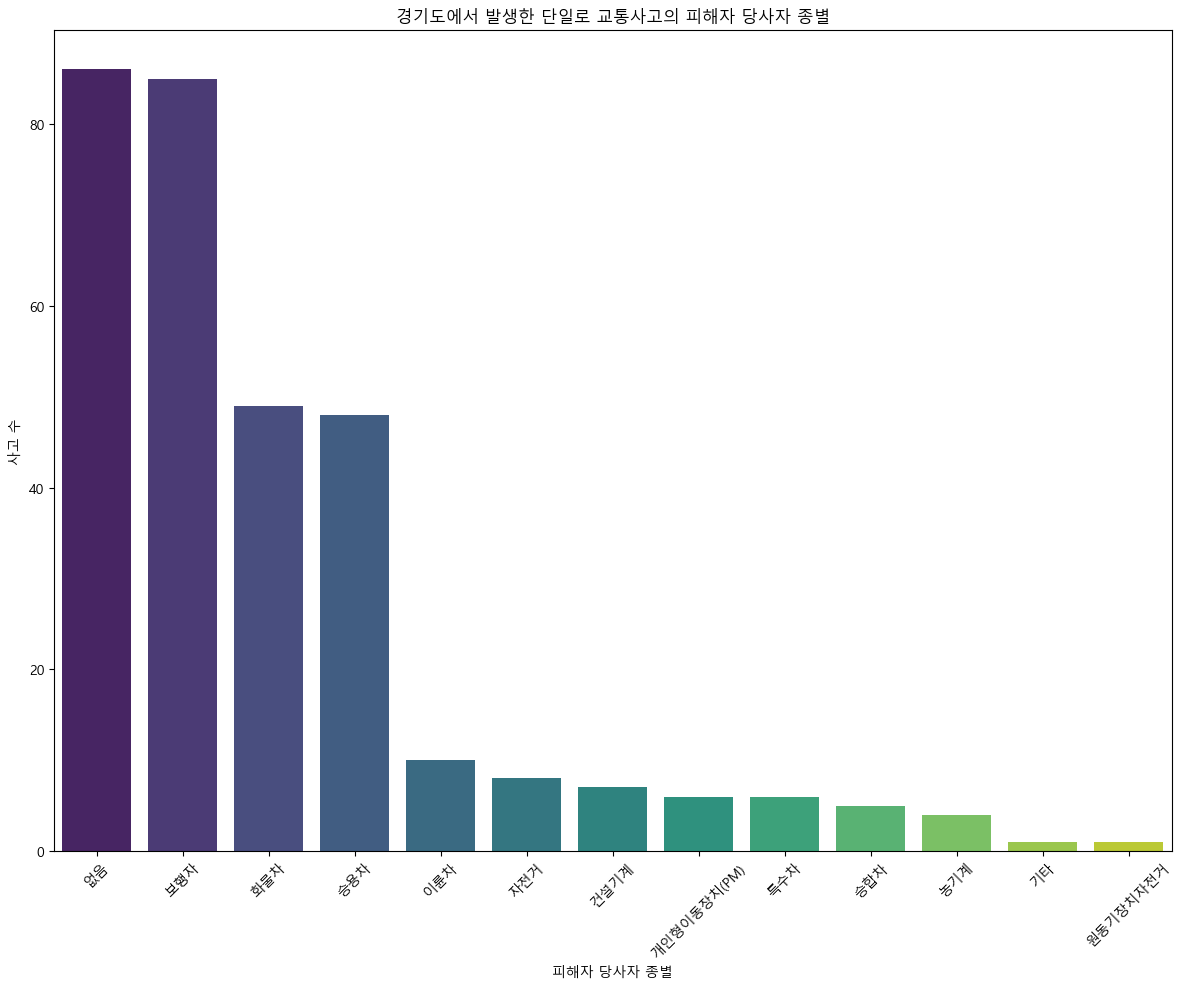

In [35]:
# 경기도에 교통사고가난 도로형태에 '단일로'가 제일 많았으며 단일로에서 어떤 사고가 더 많이 나는지 시각화

gyeonggi_accidents = data[data['발생지시도'] == '경기']
single_carriageway_accidents = gyeonggi_accidents[gyeonggi_accidents['도로형태_대분류'] == '단일로']
victim_vehicle_counts = single_carriageway_accidents['피해자_당사자종별'].value_counts()
plt.figure(figsize=(12, 10))
sns.barplot(x=victim_vehicle_counts.index, y=victim_vehicle_counts.values, palette='viridis')
plt.title('경기도에서 발생한 단일로 교통사고의 피해자 당사자 종별')
plt.xlabel('피해자 당사자 종별')
plt.ylabel('사고 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

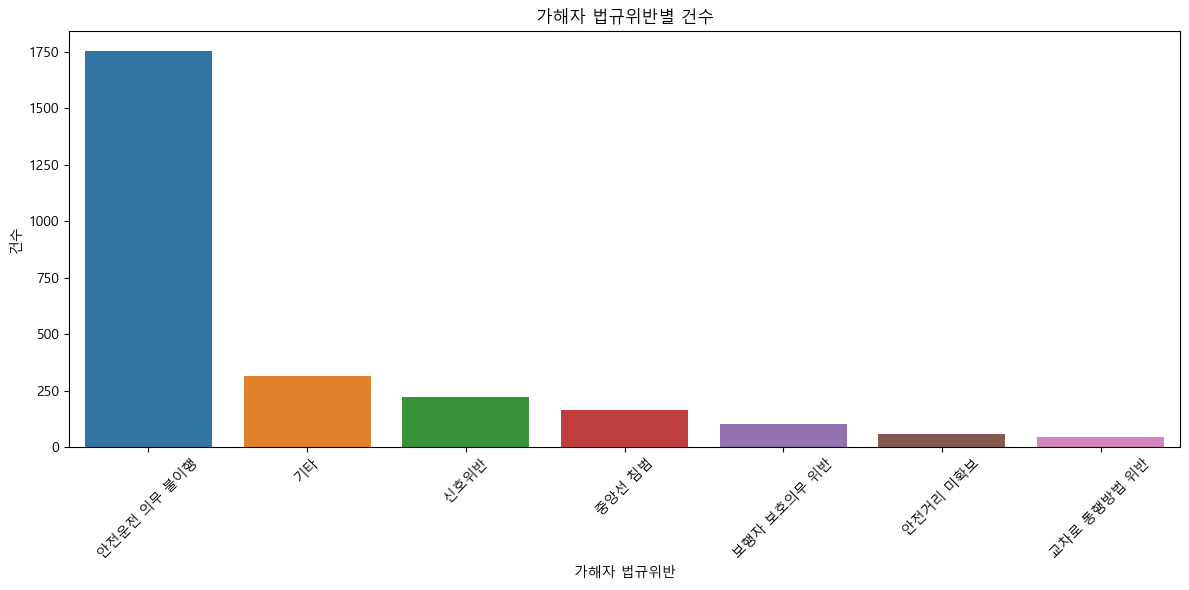

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='가해자법규위반', order=data['가해자법규위반'].value_counts().index)
plt.title('가해자 법규위반별 건수')
plt.xlabel('가해자 법규위반')
plt.ylabel('건수')
plt.xticks(rotation=45)  # x 축 레이블 회전
plt.tight_layout()
plt.show()

**경기도지역 사고정보 분석**

- 시각화 해보니 차대차가 많이 나옴
- 경기도에서 발생하는 교통사고 단일로 (중앙선이 없는 도로)에서 사고가 많이 일어남
- 경기도에서 발생한 교통사고의 피해자는 보행자로 나타남
- 단일로에 보행자 사고의 비율의 주 원인은 안전운전 의무 불이행 

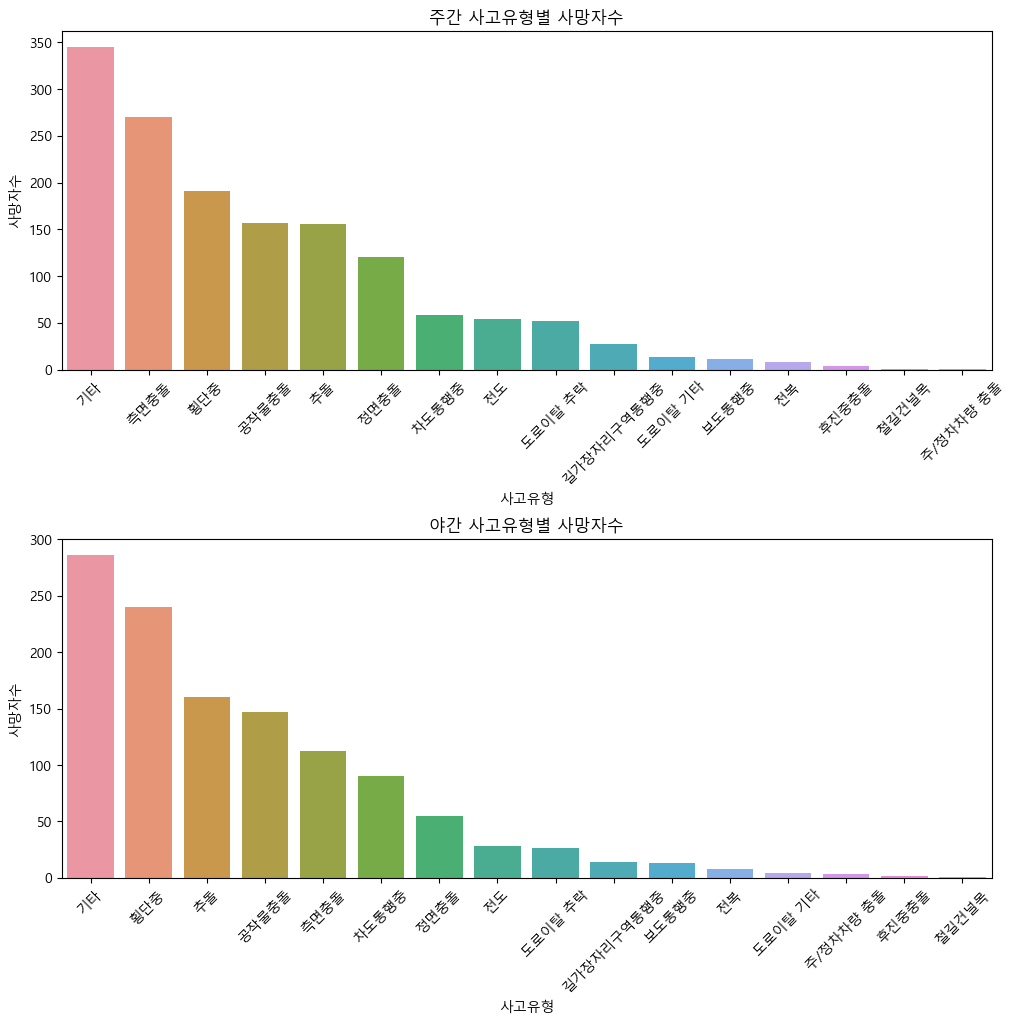

In [37]:
#주간 야간 사고유형별 사망자수

dfju = data[data['주야'] == '주']
ju = dfju.groupby('사고유형')['사망자수'].sum()

dfya = data[data['주야'] == '야']
ya = dfya.groupby('사고유형')['사망자수'].sum()

juco = dfju['사고유형'].value_counts().reset_index()
juco.columns = ['사고유형','사망자수']

yaco = dfya['사고유형'].value_counts().reset_index()
yaco.columns = ['사고유형','사망자수']

plt.figure(figsize=(12,11))
plt.subplot(2,1,1)
plt.title('주간 사고유형별 사망자수')
sns.barplot(x=juco['사고유형'], y=juco['사망자수'])
plt.xticks(rotation=45)

plt.subplot(2,1,2)
plt.title('야간 사고유형별 사망자수')
sns.barplot(x=yaco['사고유형'], y = yaco['사망자수'])
plt.xticks(rotation=45)

# 서브플롯 간격 조정
plt.subplots_adjust(hspace=0.5)  # 간격 조정


plt.show()

### 주간야간 사고유형별 사망자수

- **주간**에는 *측면충돌, 횡단중, 공작물 충돌, 추돌, 정면충돌* 순
- **야간**에는 *횡단중, 추돌, 공작물충돌, 측면충돌, 차도통행중* 순
- 주간에는 시야확보가 잘 되지만 운전자의 부주의로 측면과 횡단 그리고 공작물 충돌의 사망자가 있을거라 예상, 야간에는 어두워서 시야 확보 및 운전자의 주의력이 비교적으로 좋지 않으므로 측면 충돌에 비해 횡단중인 대인 사고가 대표적이라 판단됨
- 사고 유형별 부상자수도 궁금하여 집계 해 보았는데 같은 그래프가 그려져 이상했지만 부상자수에 관해 집계한 이유로 설명

### case2) target : 부상자수

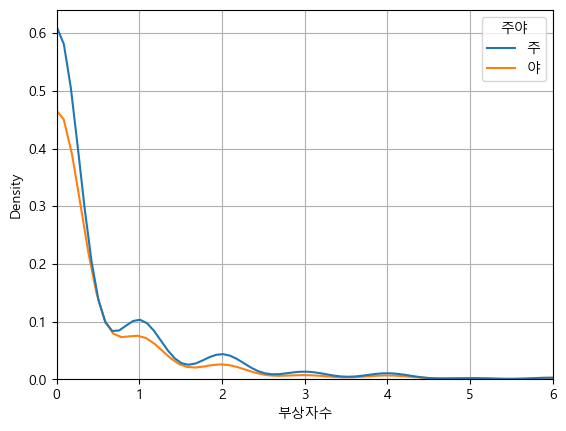

In [38]:
# 주야 별 부상자 수

sns.kdeplot(x = data['부상자수'], hue = data['주야'])
plt.xlim(0, 6)
plt.grid()
plt.show()

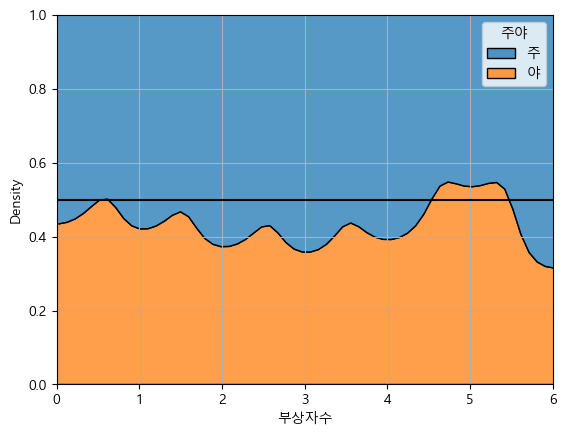

In [39]:
# 주야 별 부상자 수 

sns.kdeplot(x = data['부상자수'], hue = data['주야'], multiple = 'fill')
plt.axhline(0.5, c = 'black')
plt.xlim(0, 6)
plt.grid()
plt.show()

In [40]:
# t-test ( 주야 -> 부상자 수 )
Day = data.loc[data['주야'] == '주', '부상자수']
Night = data.loc[data['주야'] == '야', '부상자수']

spst.ttest_ind(Day, Night)

Ttest_indResult(statistic=1.3497359984784816, pvalue=0.17721570459019836)

- **주간/야간 차이가 부상자 수에 영향을 미치지 않는다.**

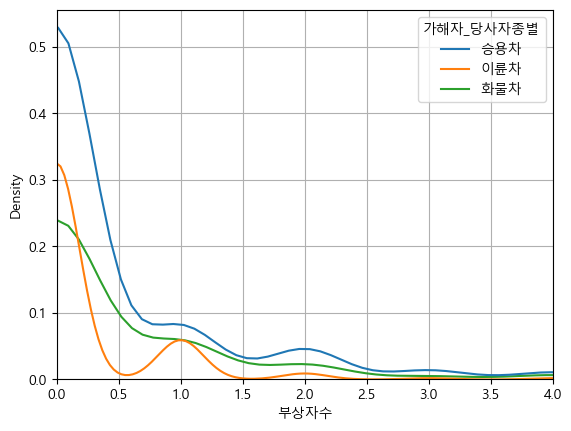

In [41]:
# 가해자 차종 별 부상자 수

sns.kdeplot(x = data['부상자수'], hue = data.loc[data['가해자_당사자종별'].isin(['승용차','화물차','이륜차']),'가해자_당사자종별'] )
plt.xlim(0,4)
plt.grid()
plt.show()

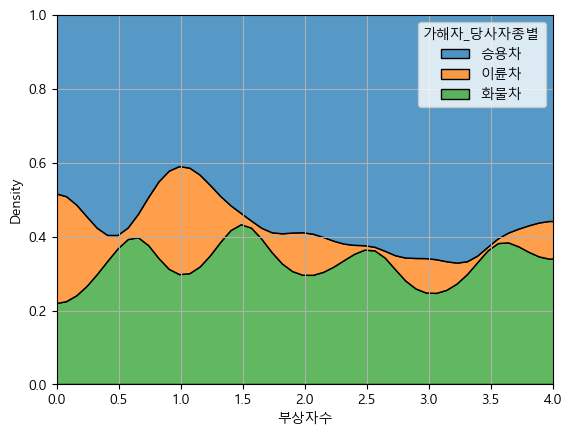

In [42]:
# 가해자 차종 별 부상자 수

sns.kdeplot(x = data['부상자수'], hue = data.loc[data['가해자_당사자종별'].isin(['승용차','화물차','이륜차']),'가해자_당사자종별'], multiple = 'fill')
plt.xlim(0,4)
plt.grid()
plt.show()

In [43]:
# ANOVA ( 가해자_당사자종별 -> 부상자 수)
승용차 = data.loc[data['가해자_당사자종별'] == '승용차', '부상자수']
화물차 = data.loc[data['가해자_당사자종별'] == '화물차', '부상자수']
이륜차 = data.loc[data['가해자_당사자종별'] == '이륜차', '부상자수']

spst.f_oneway(승용차, 화물차, 이륜차)

F_onewayResult(statistic=8.928668419696184, pvalue=0.00013749187251126883)

- **가해자의 차종이 부상자 수에 영향을 미친다.**

<img src='https://raw.githubusercontent.com/Choe-minsung/project-study/main/P1/src/TAAS_info2.png' width=800/>

- **가해자차량 - 차종별 통계**를 보면 **승용차, 화물차, 이륜차 순 비율**을 차지하는것을 알 수 있다.
- 추가적으로, 사업용차량중에서는 **택시, 렌트카**가 높은 비중을 차지하고 비사업용차량은 **승용차와 화물차의 비율이 6:1 정도**를 이룬다.

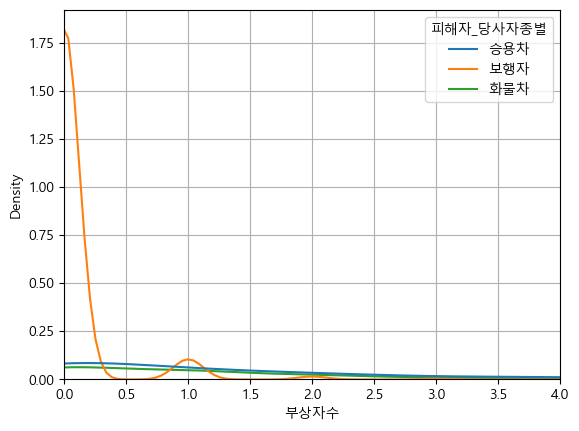

In [45]:
# 가해자 차종 별 부상자 수

sns.kdeplot(x = data['부상자수'], hue = data.loc[data['피해자_당사자종별'].isin(['보행자','승용차','화물차']),'피해자_당사자종별'] )
plt.xlim(0,4)
plt.grid()
plt.show()

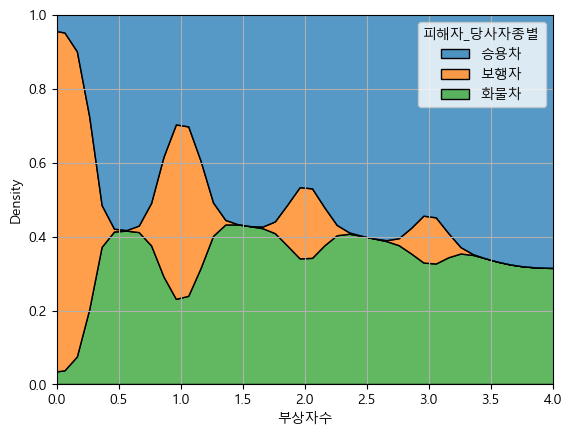

In [46]:
# 가해자 차종 별 부상자 수

sns.kdeplot(x = data['부상자수'], hue = data.loc[data['피해자_당사자종별'].isin(['보행자','승용차','화물차']),'피해자_당사자종별'], multiple = 'fill')
plt.xlim(0,4)
plt.grid()
plt.show()

In [47]:
# ANOVA ( 피해자_당사자종별 -> 부상자 수)
승용차 = data.loc[data['피해자_당사자종별'] == '승용차', '부상자수']
보행자 = data.loc[data['피해자_당사자종별'] == '보행자', '부상자수']
화물차 = data.loc[data['피해자_당사자종별'] == '화물차', '부상자수']

spst.f_oneway(승용차, 보행자, 화물차)

F_onewayResult(statistic=147.62522795853903, pvalue=2.786621092302697e-59)

- **피해자의 보행, 운행형태의 차이가 부상자 수에 영향을 미친다.** 
- **Data가 사망사고이므로 피해자의 운행형태가 승용차일 경우 함께 동승한 부상자 수를 늘리는데 영향을 더 미친다(동승자 수가 많으므로).**

### 추가 인사이트
### 2022년도 교통사고 통계 Summary

<img src='https://raw.githubusercontent.com/Choe-minsung/project-study/main/P1/src/TAAS_info.png' width=800/>

#### 2022년 교통사고현황 요약

- **차량 등록대수**는 전년대비 **2% 상승**했고 **운전면허 소지자 수**도 **1.2% 가량 상승**했다.
- 요일은 **금요일**, 시간대는 **오후 18~20시**(불금 퇴근시간)가 가장 높은 사고빈도를 차지했다.


- **출처**  


공공데이터포털  
https://www.data.go.kr/data/15070340/fileData.do

TAAS 교통사고분석시스템 : 인포그래픽  
https://taas.koroad.or.kr/sta/acs/gus/selectStaInfoGraph.do?menuId=WEB_KMP_IDA_TAI